In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
from datetime import datetime, timedelta

In [3]:
tickers = ['MGLU3.SA', 'JBSS3.SA', 'PETR3.SA', 'ITUB4.SA', 'BBDC4.SA']

In [4]:
prices = pdr.get_data_yahoo(tickers, '2017-1-1', '2020-1-1')['Close']

In [5]:
prices.head()

Symbols,MGLU3.SA,JBSS3.SA,PETR3.SA,ITUB4.SA,BBDC4.SA
Date,,,,,
2017-01-02,1.58922,11.30,16.530001,22.353300,18.031601
2017-01-03,1.58438,11.45,17.580000,23.299999,18.782900
2017-01-04,1.50000,11.45,17.370001,23.400000,18.663900
2017-01-05,1.55156,11.42,17.760000,23.719999,18.870501
2017-01-06,1.54156,11.50,17.490000,23.799999,18.989500


In [6]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 746 entries, 2017-01-02 to 2019-12-30
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MGLU3.SA  746 non-null    float64
 1   JBSS3.SA  746 non-null    float64
 2   PETR3.SA  746 non-null    float64
 3   ITUB4.SA  746 non-null    float64
 4   BBDC4.SA  746 non-null    float64
dtypes: float64(5)
memory usage: 35.0 KB


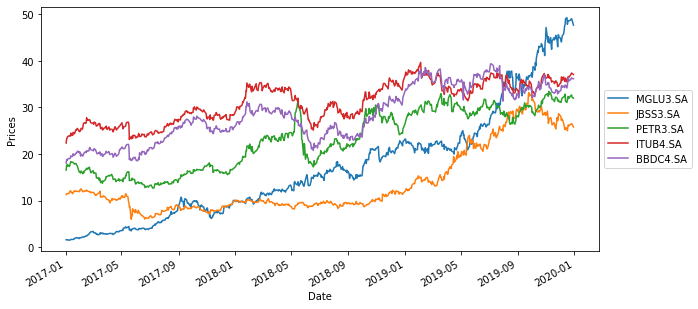

In [7]:
prices.plot(figsize=(10,5)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Prices')
plt.xlabel('Date')
plt.show()

In [8]:
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

mglu = pdr.get_data_yahoo('MGLU3.SA', start_date, end_date)
mglu.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-23,72.089996,70.250000,71.559998,70.250000,7408700.0,70.250000
2020-06-24,71.580002,68.199997,70.199997,69.800003,10694600.0,69.800003
2020-06-25,70.699997,68.739998,69.910004,69.690002,7928200.0,69.690002
2020-06-26,70.910004,68.650002,69.489998,68.959999,7425600.0,68.959999
2020-06-29,70.410004,68.349998,70.169998,70.410004,8194800.0,70.410004


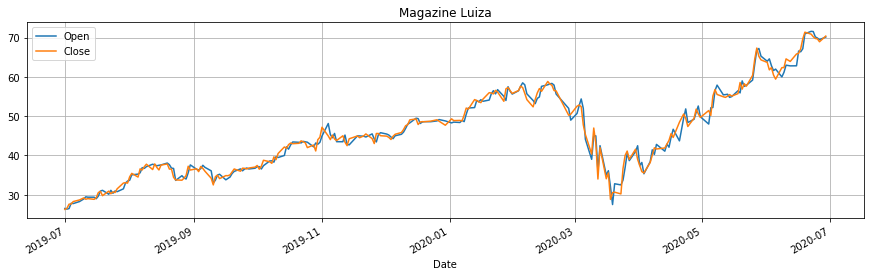

In [9]:
mglu[['Open', 'Close']].plot(figsize=(15, 4), title='Magazine Luiza', grid=True)
plt.show()

In [16]:
mglu['Daily'] = mglu['Close'].pct_change()
mglu.tail()

,High,Low,Open,Close,Volume,Adj Close,Daily
Date,,,,,,,
2020-06-23,72.089996,70.250000,71.559998,70.250000,7408700.0,70.250000,-0.009168
2020-06-24,71.580002,68.199997,70.199997,69.800003,10694600.0,69.800003,-0.006406
2020-06-25,70.699997,68.739998,69.910004,69.690002,7928200.0,69.690002,-0.001576
2020-06-26,70.910004,68.650002,69.489998,68.959999,7425600.0,68.959999,-0.010475
2020-06-29,70.410004,68.349998,70.169998,70.410004,8195000.0,70.410004,0.021027


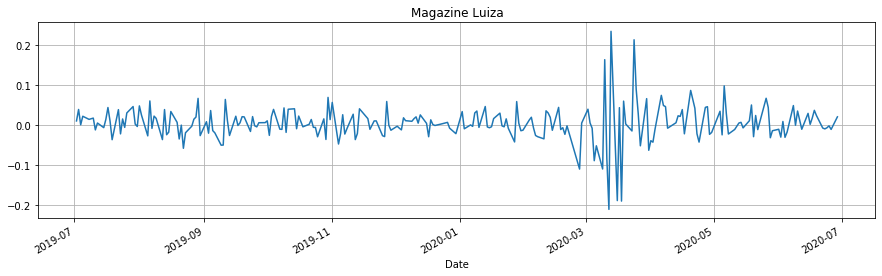

In [17]:
mglu['Daily'].plot(figsize=(15, 4), title='Magazine Luiza', grid=True)
plt.show()

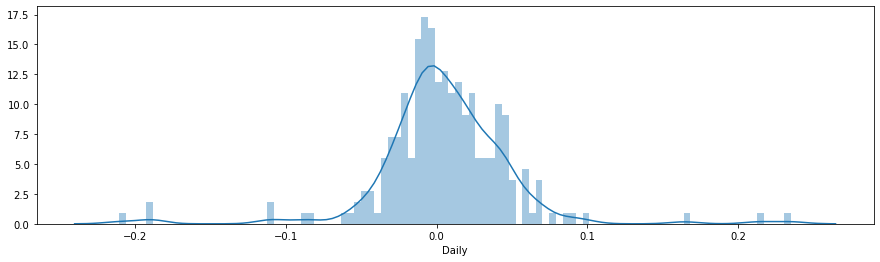

In [18]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 4))
sns.distplot(mglu['Daily'].dropna(), bins=100, ax=ax1)

In [19]:
mglu['Month'] = mglu.index.to_period('M')
mglu.tail()

,High,Low,Open,Close,Volume,Adj Close,Daily,Month
Date,,,,,,,,
2020-06-23,72.089996,70.250000,71.559998,70.250000,7408700.0,70.250000,-0.009168,2020-06
2020-06-24,71.580002,68.199997,70.199997,69.800003,10694600.0,69.800003,-0.006406,2020-06
2020-06-25,70.699997,68.739998,69.910004,69.690002,7928200.0,69.690002,-0.001576,2020-06
2020-06-26,70.910004,68.650002,69.489998,68.959999,7425600.0,68.959999,-0.010475,2020-06
2020-06-29,70.410004,68.349998,70.169998,70.410004,8195000.0,70.410004,0.021027,2020-06


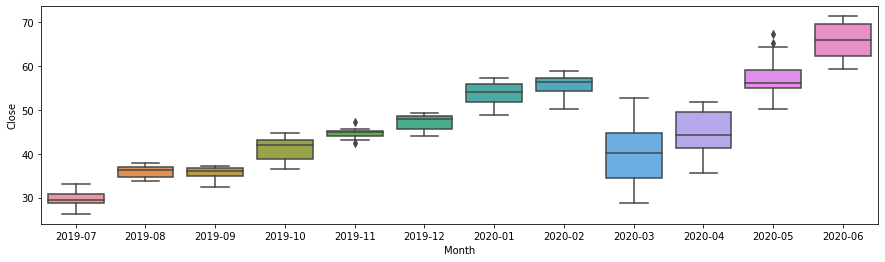

In [20]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 4))
sns.boxplot('Month', 'Close', data=mglu, ax=ax1)